In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def filter_coeffs(x_n: np.ndarray) -> np.ndarray:
    z_1: float = np.sqrt(3) - 2.0
    c_k_p: np.ndarray = np.zeros_like(x_n)
    c_k_m: np.ndarray = np.zeros_like(x_n)

    c_k_p[0] = np.sum(
        x_n * np.power(z_1, np.arange(x_n.size))
    )

    for kk in range(1, x_n.size):
        c_k_p[kk] = x_n[kk] + z_1 * c_k_p[kk - 1]

    c_k_m[-1] = (
        z_1
        * (c_k_p[-1] + z_1 * c_k_p[-2])
        / (1.0 - z_1**2)
    )

    for kk in range(2, x_n.size + 1):
        c_k_m[-kk] = z_1 * (
            c_k_m[-kk + 1] + c_k_p[-kk]
        )

    return -6 * c_k_m

In [3]:
def cubic_spline(t: np.ndarray) -> np.ndarray:
    s1: np.ndarray = (
        2.0 / 3.0
        - np.abs(t) ** 2
        + 0.5 * np.abs(t) ** 3
    )
    s2: np.ndarray = (2 - np.abs(t)) ** 3 / 6
    s3: np.ndarray = np.zeros_like(t)
    return (
        s3
        + s1 * (np.abs(t) < 1)
        + s2 * (np.abs(np.abs(t) - 1.5) <= 0.5)
    )

In [4]:
def spline_expansion(c: np.ndarray, t: np.ndarray) -> np.ndarray:
    out = np.zeros_like(t)
    t = np.mod(t, len(c))
    
    for ii, tt in enumerate(t):
        index = np.floor(tt) + np.arange(-1,3)
        fraction = tt - np.floor(tt)
        weights = cubic_spline(fraction - np.arange(-1,3))
        pp = np.mod(index.astype(int), len(c))
        coeffs = c[pp]
        out[ii] = np.sum(coeffs * weights)
    return out

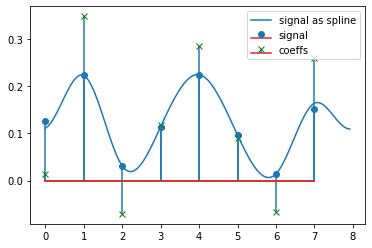

In [10]:
# generate some random samples and plot them
n = np.arange(8)
signal_samples = np.random.rand(8) / 4
#signal_samples = np.zeros_like(n).astype(float)
#signal_samples[2] = 1

spline_coeffs = filter_coeffs(signal_samples)

t = np.linspace(0, 8, 100, endpoint=False)
spline = spline_expansion(spline_coeffs, t)

plt.stem(n, signal_samples, label="signal")
plt.stem(n, spline_coeffs, label="coeffs", markerfmt="xg")
plt.plot(t, spline, label="signal as spline")
# plt.plot(t, cubic_spline(t), label="cubic spline")

plt.legend()
plt.show()